## Placeholders

In [10]:
import tensorflow as tf
import urllib2

In [11]:
x = tf.placeholder("float", 3)
y = x * 2

with tf.Session() as session:
    result = session.run(y, feed_dict={x: [1, 2, 3]})
    print(result)

[ 2.  4.  6.]


In [12]:
x = tf.placeholder(tf.float32, 3)
y = x * 2

with tf.Session() as session:
    result = session.run(y, feed_dict={x: [1, 2, 3]})
    print(result)

[ 2.  4.  6.]


In [13]:
x = tf.placeholder(tf.float32, None)
y = x * 2

with tf.Session() as session:
    result = session.run(y, feed_dict={x: [1, 2, 3]})
    print(result)

[ 2.  4.  6.]


In [14]:
x = tf.placeholder("float", [None, 3])
y = x * 2

with tf.Session() as session:
    x_data = [[1, 2, 3],
              [4, 5, 6],]
    result = session.run(y, feed_dict={x: x_data})
    print(result)

[[  2.   4.   6.]
 [  8.  10.  12.]]


315 600 3
(157, 600, 3)


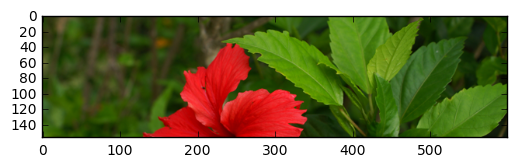

In [30]:
import tensorflow as tf
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

# First, load the image again
url = "http://wiki.nurserylive.com/uploads/default/original/2X/b/bd24518a6fb6b8dbe9e55bb793a94df7adbe9bc1.png"

try:
    data = urllib2.urlopen(url) #PNG
except Exception:
    from io import BytesIO
    data = BytesIO(urllib2.urlopen(url).read()) #JPG
    
# First, load the image
raw_image_data = mpimg.imread(data)
height, width, depth = raw_image_data.shape

print height, width, depth

image = tf.placeholder(tf.float32, [None, None, 3])
slice = tf.slice(image, [0, 0, 0], [height/2, -1, -1])

with tf.Session() as session:
    result = session.run(slice, feed_dict={image: raw_image_data})
    print(result.shape)

plt.imshow(result)
plt.show()

## Exercises

1) Take a look at the other functions for arrays in TensorFlow at the official documentation.

2) Break the image apart into four “corners”, then stitch it back together again.

315 600 3
(157, 600, 3)


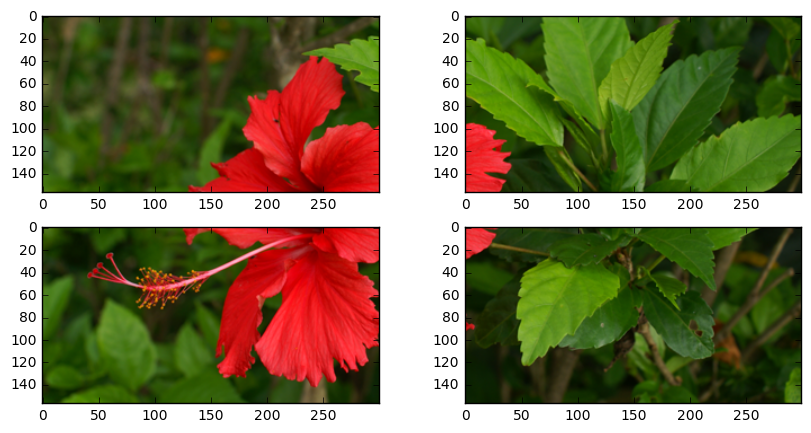

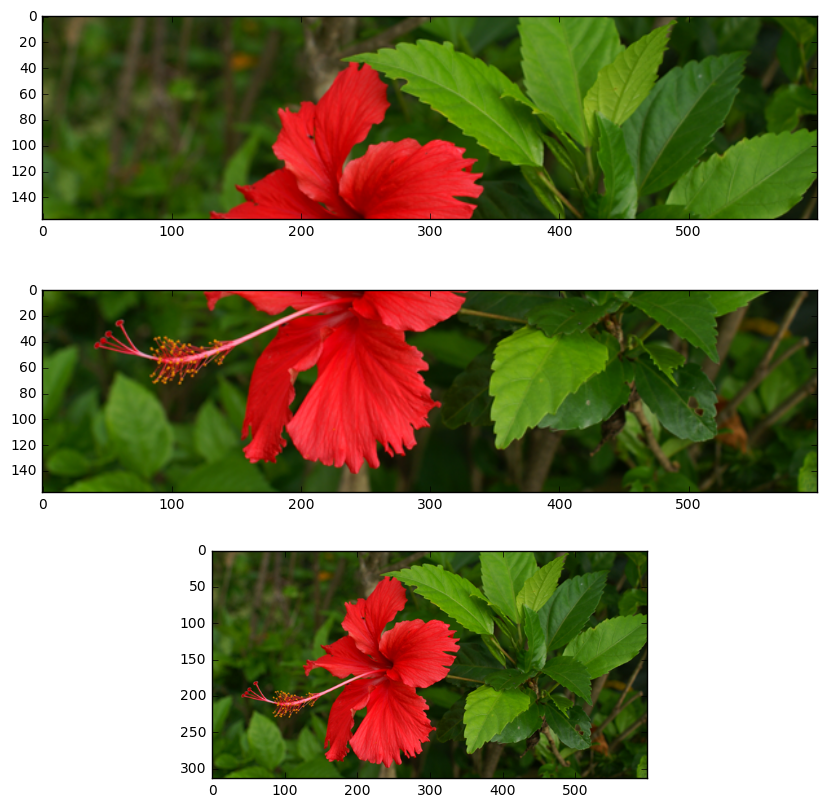

In [41]:
import tensorflow as tf
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

# First, load the image again
url = "http://wiki.nurserylive.com/uploads/default/original/2X/b/bd24518a6fb6b8dbe9e55bb793a94df7adbe9bc1.png"

try:
    data = urllib2.urlopen(url) #PNG
except Exception:
    from io import BytesIO
    data = BytesIO(urllib2.urlopen(url).read()) #JPG
    
# First, load the image
raw_image_data = mpimg.imread(data)
height, width, depth = raw_image_data.shape

print height, width, depth

image = tf.placeholder(tf.float32, [None, None, 3])
slice1 = tf.slice(image, [0, 0, 0], [height/2, width/2, -1])
slice2 = tf.slice(image, [0, width/2, 0], [height/2, width/2, -1])
slice3 = tf.slice(image, [height/2, 0, 0], [height/2, width/2, -1])
slice4 = tf.slice(image, [height/2, width/2, 0], [height/2, width/2, -1])

concat1 = tf.concat(concat_dim=1, values=[slice1, slice2])
concat2 = tf.concat(concat_dim=1, values=[slice3, slice4])

concat_all = tf.concat(concat_dim=0, values=[concat1, concat2])

with tf.Session() as session:
    result1 = session.run(slice1, feed_dict={image: raw_image_data})
    result2 = session.run(slice2, feed_dict={image: raw_image_data})
    result3 = session.run(slice3, feed_dict={image: raw_image_data})
    result4 = session.run(slice4, feed_dict={image: raw_image_data})
    
    result_c1 = session.run(concat1, feed_dict={image: raw_image_data})
    result_c2 = session.run(concat2, feed_dict={image: raw_image_data})
    result_all = session.run(concat_all, feed_dict={image: raw_image_data})    
    print(result.shape)

plt.figure(figsize=(10, 5))
plt.subplot(2,2,1)    
plt.imshow(result1)

plt.subplot(2,2,2)    
plt.imshow(result2)

plt.subplot(2,2,3)    
plt.imshow(result3)

plt.subplot(2,2,4)    
plt.imshow(result4)
plt.show()


plt.figure(figsize=(10, 10))
plt.subplot(3,1,1)    
plt.imshow(result_c1)

plt.subplot(3,1,2)    
plt.imshow(result_c2)

plt.subplot(3,1,3)    
plt.imshow(result_all)

plt.show()

3) Convert the image into grayscale. One way to do this would be to take just a single colour channel and show that. Another way would be to take the average of the three channels as the gray colour.

315 600 3
Tensor("Shape_45:0", shape=(3,), dtype=int32)


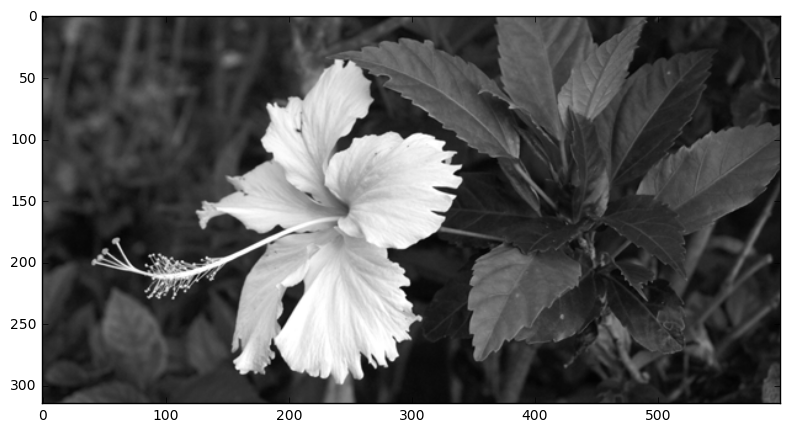

In [79]:
# First, load the image again
url = "http://wiki.nurserylive.com/uploads/default/original/2X/b/bd24518a6fb6b8dbe9e55bb793a94df7adbe9bc1.png"

try:
    data = urllib2.urlopen(url) #PNG
except Exception:
    from io import BytesIO
    data = BytesIO(urllib2.urlopen(url).read()) #JPG
    
# First, load the image
raw_image_data = mpimg.imread(data)
height, width, depth = raw_image_data.shape
print height, width, depth

image = tf.placeholder(tf.float32, [None, None, 3])
slice = tf.slice(image, [0, 0, 0], [height, width, 1])

concat_all = tf.concat(concat_dim=2, values=[slice, slice, slice])

print tf.shape(slice)
with tf.Session() as session:
    session.run(slice, feed_dict={image: raw_image_data})
    result_all = session.run(concat_all, feed_dict={image: raw_image_data})
    
plt.figure(figsize=(10, 5))
plt.subplot(1,1,1)
plt.imshow(result_all) 
plt.show()

315 600 3
Tensor("Shape_44:0", shape=(3,), dtype=int32)


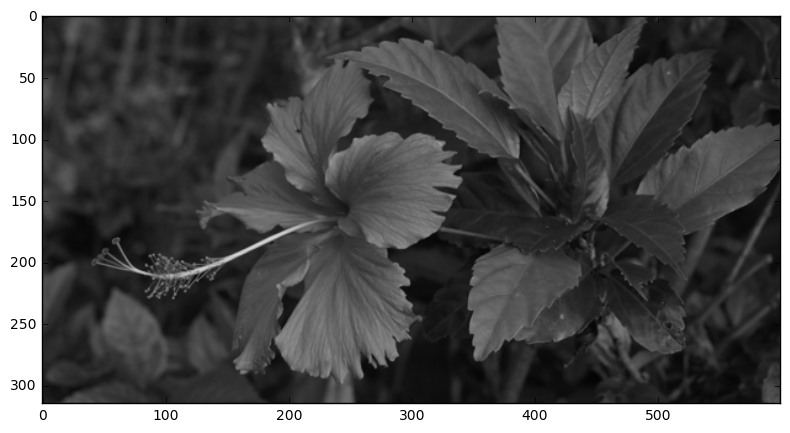

In [78]:
# First, load the image again
url = "http://wiki.nurserylive.com/uploads/default/original/2X/b/bd24518a6fb6b8dbe9e55bb793a94df7adbe9bc1.png"

try:
    data = urllib2.urlopen(url) #PNG
except Exception:
    from io import BytesIO
    data = BytesIO(urllib2.urlopen(url).read()) #JPG
    
# First, load the image
raw_image_data = mpimg.imread(data)
height, width, depth = raw_image_data.shape
print height, width, depth

image = tf.placeholder(tf.float32, [None, None, 3])
slice1 = tf.slice(image, [0, 0, 0], [height, width, 1])
slice2 = tf.slice(image, [0, 0, 1], [height, width, 1])
slice3 = tf.slice(image, [0, 0, 2], [height, width, 1])

average = (slice1 + slice2 + slice3) / 3
final = tf.concat(concat_dim=2, values=[average, average, average])

print tf.shape(avg_combine_all)

with tf.Session() as session:
    session.run(slice1, feed_dict={image: raw_image_data})
    session.run(slice2, feed_dict={image: raw_image_data})
    session.run(slice3, feed_dict={image: raw_image_data})
    session.run(average, feed_dict={image: raw_image_data})
    result_final = session.run(final, feed_dict={image: raw_image_data})
    
plt.figure(figsize=(10, 5))
plt.subplot(1,1,1)
plt.imshow(result_final) 
plt.show()